# Exploratory Data Analysis Ballots Data

# Table of Contents

* [Load Modules](#setup)
* [Load Data](#loaddata)
* [Data Cleaning](#datacleaning)
 * [Remove Columns with Personal Identifying Information](#removepii)
 * [Duplicate Rows](#duprows)
 * [Remove Ballots With Status NaN](#ballotsstatusnan)
 * [Duplicate Voter Id Records](#dupvoterid)
 * [Final Ballots Dataset](#finaldataset)
 * [Write Dataset to CSV File](#writecsv)
* [Hypothesis Testing (experimental)](#hypothesistesting)
 * [Party Affiliation vs Ballots Rejected](#partyvsrejected)
 * [Hypothesis Testing for Two-Sample Proportions](#proportions)
 * [Probablity The Ballot is Rejected depending on the Party](#partyrejectionprop)
 * [Statistical Test of Ballots Rejection rate Among Counties](#countiesrejection)
 * [Hypothesis Testing - Do the rejection rate is the same in every County?](#countyrejection)
* [Exploratory Data Analysis](#eda)
 * [Ballots Status](#ballotsstatus)
 * [Rejected Ballots](#ballotsrejected)
 * [Percentage of Ballot Rejection by County](#ballotrejectioncounty)
 * [Comparing Ballots Rejection Rate vs Population That Can Speak English Very Well](#rejectionenglish)
 * [Comparing Ballots Rejection Rate vs Earnings by County](#rejectionearnings)
 * [Demographic Data](#demographicdata)
 * [Median Earnings vs County](#earningscounty)
 * [Median Earnings vs Language](#earningslanguage)

<hr>

## Load Modules<a class="anchor" id="setup"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

<hr>

## Load Data<a  class="anchor" id="loaddata"></a>

In [2]:
ballots_dataset = pd.read_csv('../../../vbm12.6.20.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2,15,30,32,33,41,43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<hr>

## Data Cleaning<a class="anchor" id="datacleaning"></a>

### Remove Columns with Personal Identifying Information<a class="anchor" id="removepii"></a>

In [3]:
ballots_dataset.drop(columns=['voter_lastName', 'voter_firstName', 'voter_middleName', 'voter_suffix',
'ballot_addr_address1', 'ballot_addr_address2', 'ballot_addr_address3','ballot_addr_zipcode',
'voter_resAddr_address1', 'voter_resAddr_address2','voter_resAddr_address3',
'voter_resAddr_zipcode', 'voter_phone', 'voter_email'], axis=1, inplace=True)

### Remove Duplicate Rows<a class="anchor" id="duprows"></a>

In [4]:
# Remove Duplicate Rows
ballots_dataset.drop_duplicates(inplace=True)

### Remove Ballots With Status NaN<a class="anchor" id="ballotsstatusnan"></a>

In [5]:
ballots_dataset = ballots_dataset[ballots_dataset['ballot_status'].notna()].reset_index(drop=True)

In [6]:
ballots_dataset.shape

(4370938, 30)

### Voter Id Duplicate Records<a class="anchor" id="dupvoterid"></a>

In [7]:
ballots_dataset[ballots_dataset['voter_id'].duplicated(keep=False)]

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_city,ballot_addr_state,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_city,voter_resAddr_state,received_bearer
1027609,Camden,Lindenwold Borough,0,7.0,Single Election,O6429403939,Unaffiliated,Active,Regular,Camden,Lindenwold Borough,0,7,Unaffiliated,LINDENWOLD,NJ,US,09/23/2020,09/23/2020,Accepted,09/28/2020,10/17/2020,11/19/2020,Rejected,Certificate Not Signed,101,E GIBBSBORO RD,LINDENWOLD,NJ,NaN
1027610,Camden,Lindenwold Borough,0,7.0,Single Election,O6429403939,Unaffiliated,Active,Regular,Camden,Lindenwold Borough,0,7,Unaffiliated,LINDENWOLD,NJ,US,09/23/2020,09/23/2020,Accepted,09/28/2020,10/17/2020,11/19/2020,Accepted,NaN,101,E GIBBSBORO RD,LINDENWOLD,NJ,NaN
4080363,Union,Clark Township,2,4.0,Single Election,B4484851749,Republican,Active,Regular,Union,Clark Township,2,4,Republican,Clark,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/15/2020,10/27/2020,11/20/2020,Accepted,NaN,75,Victoria Dr,Clark,NJ,CHRISTOPHER PANDOLFO
4080364,Union,Clark Township,2,4.0,Single Election,B4484851749,Republican,Active,Regular,Union,Clark Township,2,4,Republican,Clark,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/15/2020,10/27/2020,11/20/2020,Accepted,NaN,75,Victoria Dr,Clark,NJ,NaN
4160513,Union,Linden City,6,2.0,Single Election,A4579251725,Democratic,Active,Regular,Union,Linden City,6,2,Democratic,Linden,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/22/2020,11/03/2020,11/20/2020,Rejected,Certificate Not Signed,119,E 11th St,Linden,NJ,ROY HERMAN
4160514,Union,Linden City,6,2.0,Single Election,A4579251725,Democratic,Active,Regular,Union,Linden City,6,2,Democratic,Linden,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/22/2020,11/03/2020,11/20/2020,Accepted,NaN,119,E 11th St,Linden,NJ,ROY HERMAN


In [8]:
# Remove duplicate voter id rows (kept Accepted ballots)
ballots_dataset.drop(index=[1027609,4160513,4080364], inplace=True)

### Final Ballots Dataset<a class="anchor" id="finaldataset"></a>

In [9]:
ballots_dataset.shape

(4370935, 30)

### Write Dataset to CSV File<a class="anchor" id="writecsv"></a>

In [10]:
ballots_dataset.to_csv('./ballots_dataset.csv', index=False)

<hr>

## Hypothesis Testing<a class="anchor" id="hypothesistesting"></a>

We want to determine if there is a statistical significant difference between the ballot rejection rate for republicans and democrats

### Party Affiliation vs Ballots Rejected<a class="anchor" id="partyvsrejected"></a>

#### Chi-square (χ2) test for independence (Pearson Chi-square test)
<strong>Hypotheses</strong><br>
Null hypotheses: The two categorical variables are independent (no association between the two variables) ( $H_{0}$&emsp;:&emsp;$O_{i} = E_{i}$ )<br>
Alternative hypotheses: The two categorical variables are dependent (there is an association between the two variables) ( $H_{1}$&emsp;:&emsp;$O_{i} \neq E_{i}$ )<br>
<br>
<strong>Assumptions</strong><br>
1. The two variables are categorical (nominal) and data is randomly sampled<br>
2. The levels of variables are mutually exclusive<br>
3. The expected frequency count for at least 80% of the cell in a contingency table is at least 5<br>
4. The expected frequency count should not be less than 1<br>
5. Observations should be independent of each other<br>
6. Observation data should be frequency counts and not percentages or transformed data<br>

In [48]:
data_crosstab = pd.crosstab(ballots_dataset['ballot_vtr_party'], ballots_dataset['ballot_status'], margins = False)
data_crosstab['Accepted_total']=data_crosstab['Accepted'] + data_crosstab['Received']
data_crosstab.drop(columns=['Accepted','Received'], axis=1, inplace=True)

In [57]:
g, p, dof, expctd = chi2_contingency(data_crosstab.loc[['Republican','Democratic'],:])
print('p-value -> {0:0.3f}'.format(p), ' < 0.05, we reject the null hypothesis. The two categorical variables are dependent.')

p-value -> 0.000  < 0.05, we reject the null hypothesis. The two categorical variables are dependent.


### Hypothesis Testing for Two-Sample Proportions<a class="anchor" id="proportions"></a>

Null Hypothesis&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $H_{0}$: $p_{0} = p_{1}$<br>
Alternative Hypothesis &emsp;&emsp;$H_{1}$: $p_{0} \neq p_{1}$

In [131]:
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
count = np.array([data_crosstab.loc['Democratic','Rejected'], data_crosstab.loc['Republican','Rejected']])
nobs = np.array([data_crosstab.loc['Democratic',:].sum(), data_crosstab.loc['Republican',:].sum()])
stat, pval = proportions_ztest(count, nobs)
print('P-value = {0:0.3f}'.format(pval),' < 0.05, we reject the null hypothesis.\n\
The probability the ballot is rejected depends if the voter is a Democrats or Republicans')

P-value = 0.000  < 0.05, we reject the null hypothesis.
The probability the ballot is rejected depends if the voter ia a Democrats or Republicans


### Probablity The Ballot is Rejected depending on the Party<a class="anchor" id="partyrejectionprop"></a>

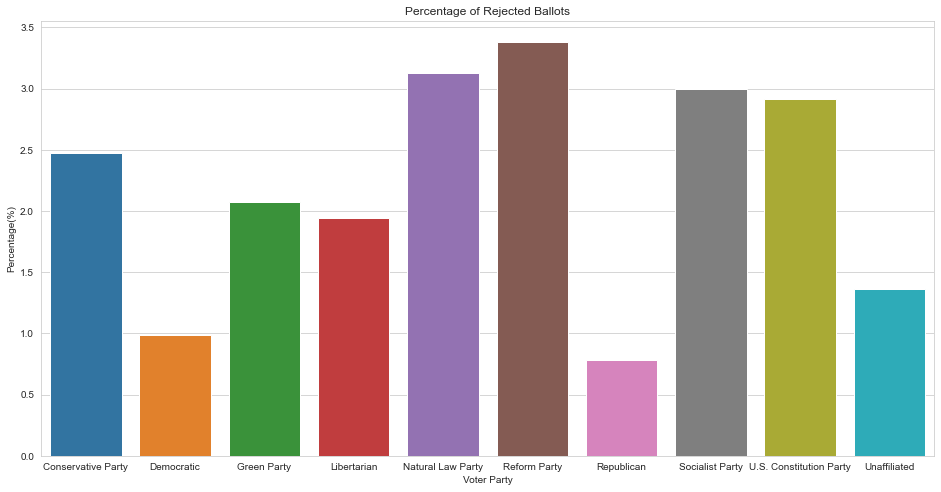

In [145]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='ballot_vtr_party', y=0, data=pd.DataFrame(data_crosstab['Rejected'] / data_crosstab.sum(axis=1)*100).reset_index(), ax = ax)
plot_var = ax.set(xlabel='Voter Party', ylabel='Percentage(%)', title="Percentage of Rejected Ballots")

### Statistical Test of Ballots Rejection rate Among Counties<a class="anchor" id="countiesrejection"></a>

In [74]:
county_crosstab = pd.crosstab(ballots_dataset['ballot_county'],ballots_dataset['ballot_status'], margins=False)
county_crosstab['Accepted_total']=county_crosstab['Accepted']+county_crosstab['Received']
county_crosstab.drop(columns=['Accepted','Received'], axis=1, inplace=True)

In [80]:
g, p, dof, expctd = chi2_contingency(county_crosstab)
print('p-value -> {0:0.3f}'.format(p), ' < 0.05, we reject the null hypothesis. The two categorical variables are dependent.')

p-value -> 0.000  < 0.05, we reject the null hypothesis. The two categorical variables are dependent.


### Hypothesis Testing - Do the rejection rate is the same in every County?<a class="anchor" id="countyrejection"></a><br>
Trying to test the notion that rejection rate is the same in every county. It seems proportions_ztest only supports two variables (same with proportions_chisquare). There is a chance that prop.test in R supports more than two variables.

In [93]:
from statsmodels.stats.proportion import proportions_chisquare

In [132]:
count = np.array(county_crosstab['Rejected'])
nobs = np.array(county_crosstab.sum(axis=1))
# chi2stat, pval = proportions_chisquare(count, nobs)
# print('P-value = {0:0.3f}'.format(pval),' < 0.05, we reject the null hypothesis. The rejection rate is different between Democrats and Republicans')
# stat, pval = proportions_ztest(count, nobs)

<hr>

## Exploratory Data Analysis<a class="anchor" id="eda"></a>

### Ballots Status<a class="anchor" id="ballotsstatus"></a>

In [11]:
ballots_status = pd.DataFrame(ballots_dataset['ballot_status'].value_counts())
ballots_status.reset_index(inplace=True)
ballots_status.columns = ['status','count']
ballots_status = ballots_status['count'] / ballots_status['count'].sum() * 100
pd.DataFrame(round(ballots_status,2))

,count
0,78.57
1,20.36
2,1.07


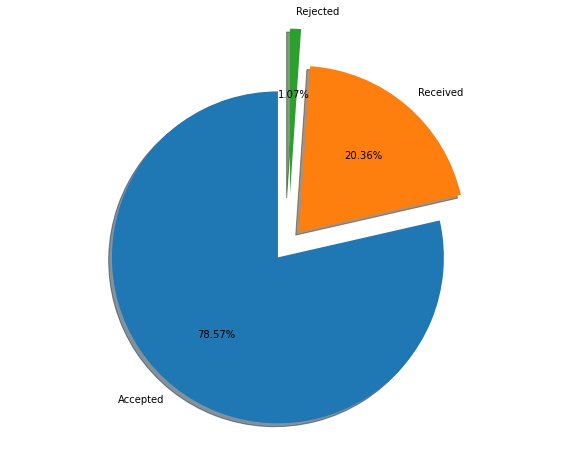

In [12]:
# Plot Rejected Ballots
labels = ['Accepted', 'Received', 'Rejected']
sizes = list(ballots_status)
explode = (0.1, 0.1, 0.3)

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

### Ballots Rejected<a class="anchor" id="ballotsrejected"></a>

In [13]:
# Number of rejected ballots
ballots_rejected = ballots_dataset[ballots_dataset['ballot_status']=='Rejected']
# Percentage
ballots_rejected = pd.DataFrame(ballots_rejected['received_rejReason'].value_counts() / ballots_rejected.shape[0] * 100).reset_index()
# Rename columns header
ballots_rejected.columns = ['reason','count']

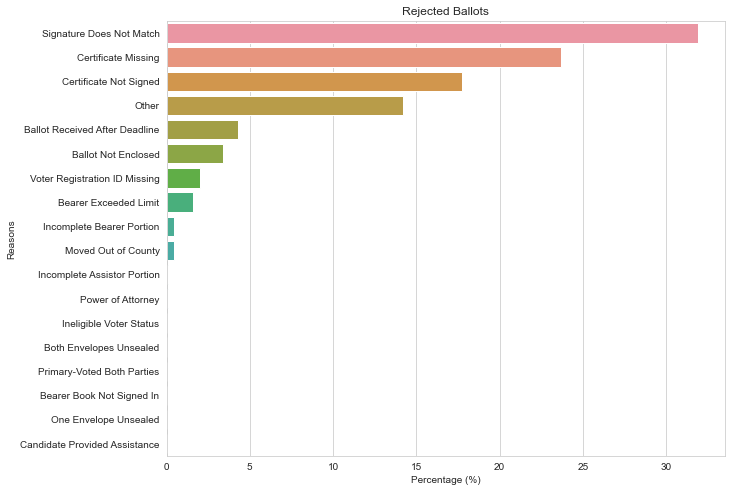

In [14]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='count', y='reason', data=ballots_rejected, ax = ax)
plot_var = ax.set(xlabel='Percentage (%)', ylabel='Reasons', title="Rejected Ballots")


In [15]:
# Combine low percentage reasons with Other
others_percent = ballots_rejected[ballots_rejected['reason'].isin(['Ballot Not Enclosed', 'Bearer Exceeded Limit', 'Incomplete Bearer Portion',
 'Moved Out of County', 'Incomplete Assistor Portion', 'Power of Attorney',
 'Ineligible Voter Status', 'Both Envelopes Unsealed', 'Bearer Book Not Signed In',
 'Primary-Voted Both Parties', 'One Envelope Unsealed', 'Candidate Provided Assistance'])]['count'].sum()

In [16]:
ballots_rejected.loc[3,'count'] = ballots_rejected.loc[3,'count'] + others_percent

In [17]:
ballots_rejected.drop(index=
ballots_rejected[ballots_rejected['reason'].isin(['Ballot Not Enclosed', 'Bearer Exceeded Limit', 'Incomplete Bearer Portion',
 'Moved Out of County', 'Incomplete Assistor Portion', 'Power of Attorney',
 'Ineligible Voter Status', 'Both Envelopes Unsealed', 'Bearer Book Not Signed In',
 'Primary-Voted Both Parties', 'One Envelope Unsealed', 'Candidate Provided Assistance'])].index, inplace=True)

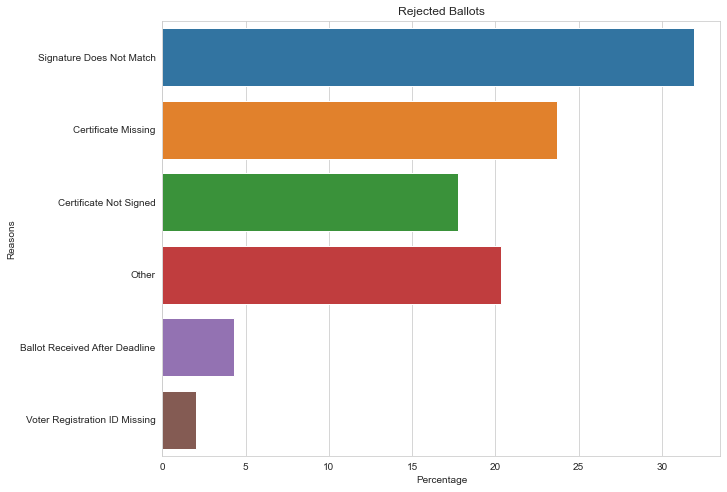

In [18]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='count', y='reason', data=ballots_rejected, ax = ax)
plot_var = ax.set(xlabel='Percentage', ylabel='Reasons', title="Rejected Ballots")

### Percentage of Ballot Rejection by County<a class="anchor" id="ballotrejectioncounty"></a>

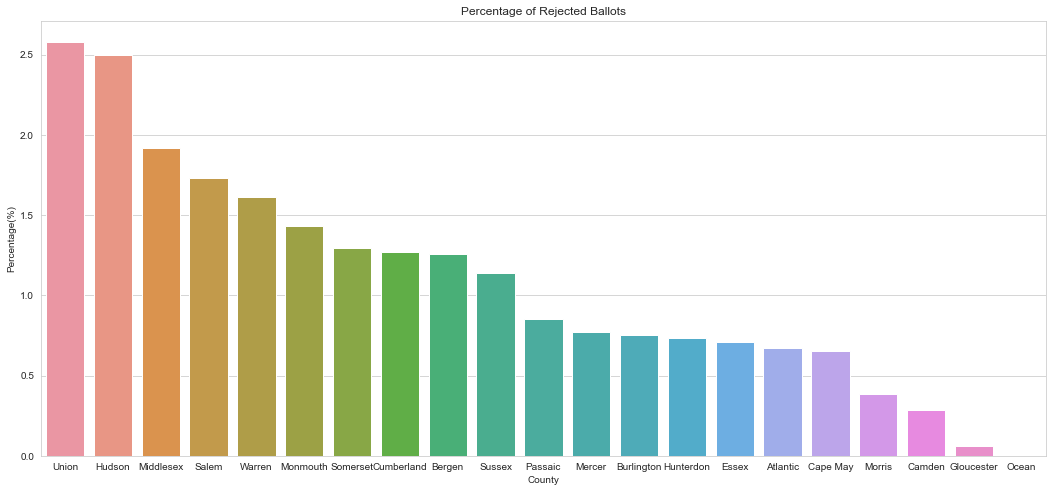

In [198]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18,8))
sns.barplot(x='ballot_county', y=0, data=pd.DataFrame(county_crosstab['Rejected'] / county_crosstab.sum(axis=1)*100).reset_index().sort_values(by=0, ascending=False), ax = ax)
plot_var = ax.set(xlabel='County', ylabel='Percentage(%)', title="Percentage of Rejected Ballots")

### Comparing Ballots Rejection Rate vs Population That Can Speak English Very Well<a class="anchor" id="rejectionenglish"></a>

In [173]:
county_percent = pd.DataFrame(county_crosstab['Rejected'] / county_crosstab.sum(axis=1)*100).reset_index()

In [164]:
language_dataset = pd.read_csv('./spoken_language_home.csv')

In [169]:
# Imputed Salem County value of percent_speak_english_very_well with data from:
# Survey/Program: American Community Survey
# TableID: S1601
# Product: 2019: ACS 5-Year Estimates Subject Tables
# URL: https://data.census.gov/cedsci/table?q=Language&g=0500000US34033&tid=ACSST5Y2019.S1601&hidePreview=true
language_percent = pd.DataFrame(language_dataset['percent_speak_english_very_well'].fillna(97.5))

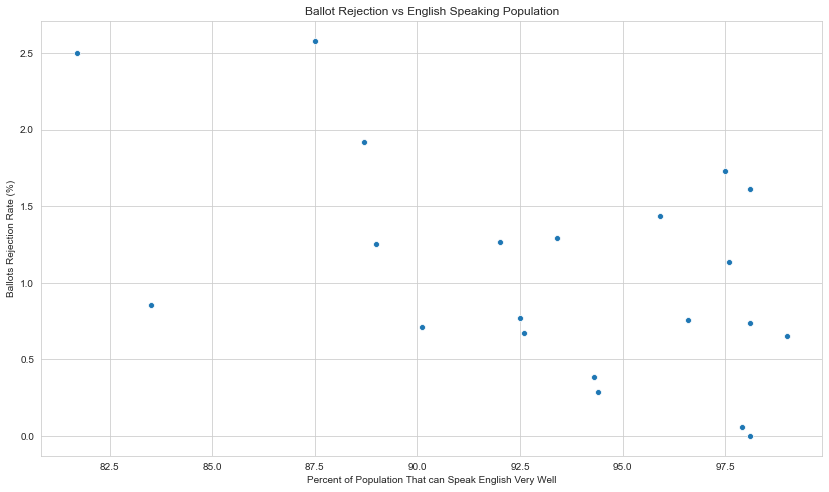

In [181]:
fig, ax = plt.subplots(figsize=(14,8))
gchart = sns.scatterplot(x='percent_speak_english_very_well', y=0, data=pd.concat([county_percent, language_percent], axis=1), ax=ax)
chart_settings = ax.set(xlabel='Percent of Population That can Speak English Very Well',
                        ylabel='Ballots Rejection Rate (%)', title="Ballot Rejection vs English Speaking Population")

### Comparing Ballots Rejection Rate vs Earnings by County<a class="anchor" id="rejectionearnings"></a>

In [182]:
# Load meadian_earnings dataset
earnings_dataset = pd.read_csv('../Khamanna/median_earnings.csv')
earnings_dataset.drop(columns='Unnamed: 0', axis=1, inplace=True)
earnings_dataset.county = earnings_dataset.county.str.replace(' County, New Jersey','')

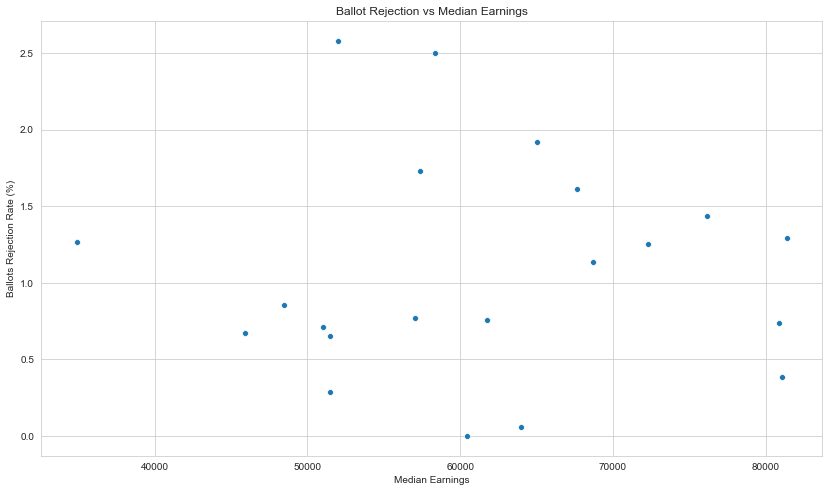

In [196]:
fig, ax = plt.subplots(figsize=(14,8))
gchart = sns.scatterplot(x='median_earnings', y=0, data=county_percent.merge(earnings_dataset, left_on='ballot_county', right_on="county"), ax=ax)
chart_settings = ax.set(xlabel='Median Earnings',
                        ylabel='Ballots Rejection Rate (%)', title="Ballot Rejection vs Median Earnings")

### Demographic Data<a class="anchor" id="demographicdata"></a>

In [237]:
demographic_dataset = pd.read_csv('./demographic_dataset.csv')

In [238]:
demographic_dataset

,County,Percent Hispanic or Latino,Percent White,Percent Black or African American,Percent American Indian and Alaska Native,Percent Asian,Percent Native Hawaiian and Other Pacific Islander,Percent Other Race,Percent Two or more races,percent_english,percent_spanish,percent_other,percent_english_very_well,percent_english_not_very_well,median_earnings,HS_and_less,more_than_HS,%HS_and_less,more_than_HS%
0,"Atlantic County, New Jersey",19.4,55.9,13.7,0.2,7.8,0.2,0.1,2.7,79.4,11.1,9.5,92.6,7.4,45935,32464,175711,15.6,84.4
1,"Bergen County, New Jersey",21.0,55.0,5.1,0.1,16.4,0.1,0.3,2.0,64.5,14.0,21.5,89.0,11.0,72267,70554,665338,9.6,90.4
2,"Burlington County, New Jersey",8.5,66.4,16.4,0.0,5.1,0.0,0.4,3.2,88.4,3.9,7.7,96.6,3.4,61748,35189,318001,10.0,90.0
3,"Camden County, New Jersey",17.6,55.6,18.4,0.1,5.7,0.0,0.5,2.2,84.6,9.7,5.7,94.4,5.6,51486,55085,337381,14.0,86.0
4,"Cape May County, New Jersey",8.1,85.0,4.2,0.0,0.5,0.0,0.0,2.2,95.5,2.4,2.1,99.0,1.0,51483,7929,68160,10.4,89.6
5,"Cumberland County, New Jersey",31.8,45.4,18.0,0.9,1.2,0.0,0.0,2.6,78.7,17.8,3.5,92.0,8.0,34905,25602,88369,22.5,77.5
6,"Essex County, New Jersey",23.8,29.8,38.4,0.2,5.4,0.0,0.9,1.5,70.6,15.8,13.5,90.1,9.9,51029,103304,506293,16.9,83.1
7,"Gloucester County, New Jersey",6.7,77.7,10.3,0.0,3.1,0.0,0.1,2.0,91.0,3.9,5.1,97.9,2.1,64004,22770,205767,10.0,90.0
8,"Hudson County, New Jersey",42.7,28.8,10.3,0.1,15.3,0.0,0.5,2.2,50.9,32.8,16.3,81.7,18.3,58372,87458,448406,16.3,83.7
9,"Hunterdon County, New Jersey",7.0,84.3,2.4,0.0,4.2,0.0,0.5,1.6,90.6,2.7,6.7,98.1,1.9,80882,9679,90980,9.6,90.4


### Median Earnings vs County<a class="anchor" id="earningscounty"></a>

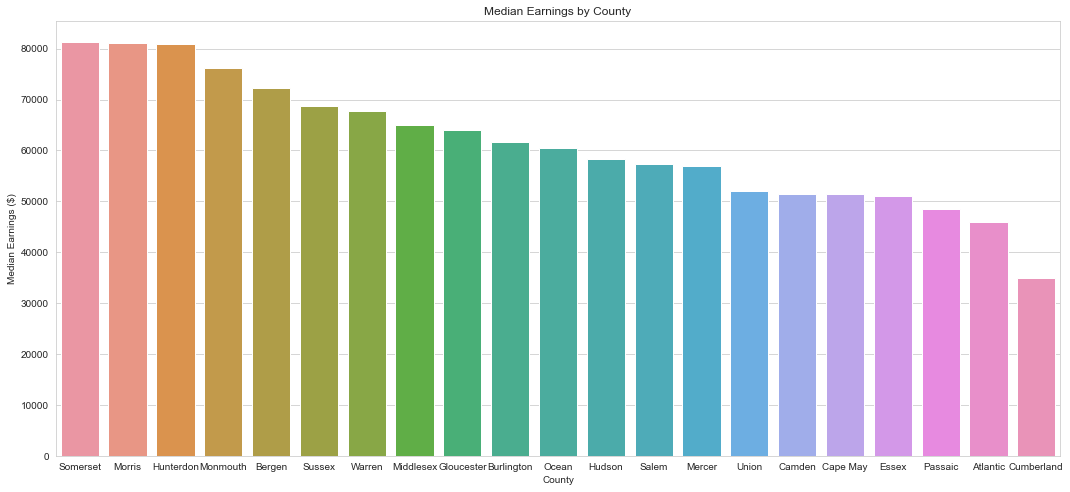

In [234]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18,8))
sns.barplot(x='county', y='median_earnings', data=earnings_dataset.sort_values(by='median_earnings', axis=0, ascending=False), ax = ax)
plot_var = ax.set(xlabel='County', ylabel='Median Earnings ($)', title="Median Earnings by County")

### Median Earnings vs Language<a class="anchor" id="earningslanguage"></a>

In [236]:
demographic_dataset.head()
# percent_english_very_well

,Unnamed: 0,County,Percent Hispanic or Latino,Percent White,Percent Black or African American,Percent American Indian and Alaska Native,Percent Asian,Percent Native Hawaiian and Other Pacific Islander,Percent Other Race,Percent Two or more races,percent_english,percent_spanish,percent_other,percent_english_very_well,percent_english_not_very_well,median_earnings,Pop18_24,over_25_HS_grad_or_higher,18_24_less_HS_HSgrad,18_24_associate_bachelor,over_25_less_than_HS,Pop_over25,Hs_and_less,Hs_and_more,Population,%Hs_and_less
0,0,"Atlantic County, New Jersey",19.4,55.9,13.7,0.2,7.8,0.2,0.1,2.7,79.4,11.1,9.5,92.6,7.4,45935,24683,160782,9754,14929,22710,183492,32464,175711,208175,84.4
1,1,"Bergen County, New Jersey",21.0,55.0,5.1,0.1,16.4,0.1,0.3,2.0,64.5,14.0,21.5,89.0,11.0,72267,74163,614966,23791,50372,46763,661729,70554,665338,735892,90.4
2,2,"Burlington County, New Jersey",8.5,66.4,16.4,0.0,5.1,0.0,0.4,3.2,88.4,3.9,7.7,96.6,3.4,61748,36899,297585,16483,20416,18706,316291,35189,318001,353190,90.0
3,3,"Camden County, New Jersey",17.6,55.6,18.4,0.1,5.7,0.0,0.5,2.2,84.6,9.7,5.7,94.4,5.6,51486,41040,315138,18797,22243,36288,351426,55085,337381,392466,86.0
4,4,"Cape May County, New Jersey",8.1,85.0,4.2,0.0,0.5,0.0,0.0,2.2,95.5,2.4,2.1,99.0,1.0,51483,6132,65427,3399,2733,4530,69957,7929,68160,76089,89.6
